**bibiotecas utilizadas**

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

**Exportando a panilha do execel formato xlsx para o python**

In [2]:
df = pd.read_excel("Tabela_de_analise.xlsx")
df

,ID,Região,Pagamento,Origem,Valor ($),Produto,Horário
0,10001,Leste,Boleto,Web,20.19,On-line,22:19:00
1,10002,Oeste,Cartão,Web,17.85,On-line,13:27:00
2,10003,Norte,Cartão,Web,23.98,On-line,14:27:00
3,10004,Oeste,Boleto,E-mail,23.51,Livro,15:38:00
4,10005,Sul,Cartão,Web,15.33,Livro,15:21:00
...,...,...,...,...,...,...,...
505,10506,Sul,Cartão,Web,16.35,Livro,22:29:00
506,10507,Oeste,Boleto,Web,23.70,Livro,20:43:00
507,10508,Sul,Cartão,Web,22.02,On-line,11:55:00
508,10509,Leste,Boleto,Web,23.53,On-line,21:52:00


**Vendo a quantiade de objetos não nulos**

In [3]:
#Vendo a quantiade de objetos não nulos
df = pd.read_excel("Tabela_de_analise.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         510 non-null    int64  
 1   Região     510 non-null    object 
 2   Pagamento  510 non-null    object 
 3   Origem     510 non-null    object 
 4   Valor ($)  510 non-null    float64
 5   Produto    510 non-null    object 
 6   Horário    510 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 28.0+ KB


**Tirando o ID da tabela, pois ele não importa na análise do problema**

In [4]:
df.drop(columns=['ID'], inplace = True)
df

,Região,Pagamento,Origem,Valor ($),Produto,Horário
0,Leste,Boleto,Web,20.19,On-line,22:19:00
1,Oeste,Cartão,Web,17.85,On-line,13:27:00
2,Norte,Cartão,Web,23.98,On-line,14:27:00
3,Oeste,Boleto,E-mail,23.51,Livro,15:38:00
4,Sul,Cartão,Web,15.33,Livro,15:21:00
...,...,...,...,...,...,...
505,Sul,Cartão,Web,16.35,Livro,22:29:00
506,Oeste,Boleto,Web,23.70,Livro,20:43:00
507,Sul,Cartão,Web,22.02,On-line,11:55:00
508,Leste,Boleto,Web,23.53,On-line,21:52:00


**Definindo os nomes da colunas da tabela**

In [5]:
nomeColunas = ['Região','Pagamento','Origem','Valor ($)','Produto','Horário']

**Análise de pedidos por região** 

1 -> Filtro das regiões

In [6]:
filtro_leste = df['Região'] == "Leste"
filtro_oeste = df['Região'] == "Oeste"
filtro_norte = df['Região'] == "Norte"
filtro_sul = df['Região'] == "Sul"

2 -> Criando as tabelas para cada região 

In [7]:
dfleste = df[filtro_leste]
dfoeste = df[filtro_oeste]
dfnorte = df[filtro_norte]
dfsul = df[filtro_sul]

3 -> Contagem dos pedidos por região

In [8]:
Rl = dfleste["Região"].count()
Ro = dfoeste["Região"].count()
Rn = dfnorte["Região"].count()
Rs = dfsul["Região"].count()
print(f"Quantidade de pedidos para região Leste = {Rl}")
print(f"Quantidade de pedidos para região Oeste = {Ro}")
print(f"Quantidade de pedidos para região Norte = {Rn}")
print(f"Quantidade de pedidos para região Sul = {Rs}")

Quantidade de pedidos para região Leste = 101
Quantidade de pedidos para região Oeste = 211
Quantidade de pedidos para região Norte = 92
Quantidade de pedidos para região Sul = 106


4 -> Gráfico da contagem dos pedidos por região

Text(0.5, 0, 'Região')

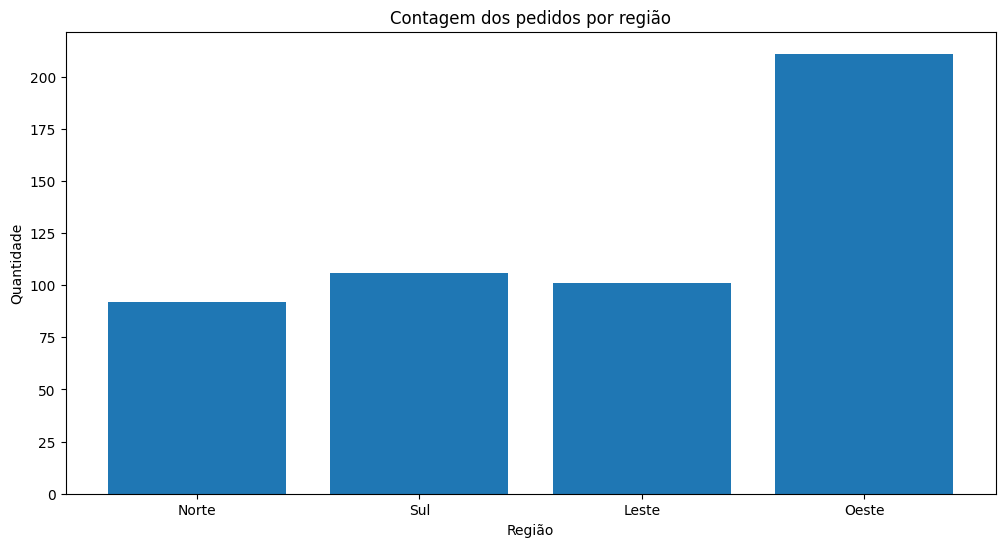

In [13]:
plt.figure(figsize=(12,6))
dados = {
    'Região': ['Norte', 'Sul', 'Leste', 'Oeste'],
    'Quantidade': [Rn, Rs, Rl, Ro]
}
dfn = pd.DataFrame(dados)
plt.ylabel("Quantidade") 
plt.bar(dfn['Região'], dfn['Quantidade'])
plt.title("Contagem dos pedidos por região")
plt.xlabel("Região")

5 -> Custo médio por região

In [12]:
Cl = dfleste["Valor ($)"].median()
Co = dfoeste["Valor ($)"].median()
Cn = dfnorte["Valor ($)"].median()
Cs = dfsul["Valor ($)"].median()

print(f"Custo médio para região Leste = {Cl}")
print(f"Custo médio para região Oeste = {Co}")
print(f"Custo médio para região Norte = {Cn}")
print(f"Custo médio para região Sul = {Cs}")

Custo médio para região Leste = 20.39
Custo médio para região Oeste = 20.61
Custo médio para região Norte = 20.29
Custo médio para região Sul = 20.465
